In [1]:
def read_label_map(label_map_path):

    item_id = None
    item_name = None
    items = {}
    
    with open(label_map_path, "r") as file:
        for line in file:
            line.replace(" ", "")
            if line == "item{":
                pass
            elif line == "}":
                pass
            elif "id:" in line:
                item_id = int(line.split(":", 1)[1].strip())
            elif "name" in line:
                item_name = line.split(":", 1)[1].replace("'", "").strip()

            if item_id is not None and item_name is not None:
                items[item_id] = item_name
                item_id = None
                item_name = None
            items[81] = "happens"

    return items


items = read_label_map("../assets/ava_action_list_v2.1.pbtxt")

# main_path = '/tmp2'
images_path = '/data02/ava/frames'
vis_save_path = './output_images'
 
# TubeR's csn152, ava21 results
detection = '../tmp3/0.txt' #numbers are changeable
gt = '../tmp3/GT_0.txt'

query_num = 15

In [2]:
anno_dict = {}
with open(gt) as f:
    for line in f.readlines():
        img_id = line.split(' ')[0]
        annotation = [int(float(n)) for n in line.split('[')[1].split(']')[0].split(',')]
        multi_hot_obj_label = annotation[6:]
        obj_labels = [items[i+1] for i, e in enumerate(multi_hot_obj_label) if e!=0]
        coord = annotation[2:6]
        if img_id not in anno_dict.keys():
            anno_dict[img_id] = {
                "obj": [obj_labels],
                "coord": [coord]
            }
        else:
            anno_dict[img_id]["obj"].append(obj_labels)
            anno_dict[img_id]["coord"].append(coord)

# print("test if anno_dict is well constructed: ", anno_dict['_dBTTYDRdRQ_1528'])

pred_dict = {}
with open(detection) as f:
    for line in f.readlines(): #[0::15]:
        img_id = line.split(' ')[0]
        # print(line)
        annotation = [float(n) for n in line.split('[')[1].split(']')[0].split(',')]
        multi_hot_obj_label = annotation[4:-1]
        # print(len(multi_hot_obj_label))
        obj_labels = [items[i+1] for i, e in enumerate([k>0.7 for k in multi_hot_obj_label]) if e]
        # print([k>1e-30 for k in multi_hot_obj_label])
        if len(obj_labels)==0:
            continue
        coord = annotation[:4]
        if img_id not in pred_dict.keys():
            pred_dict[img_id] = {
                "obj": [obj_labels],
                "coord": [coord]
            }
        else:
            pred_dict[img_id]["obj"].append(obj_labels)
            pred_dict[img_id]["coord"].append(coord)


In [ ]:
# from IPython.display import Image
import PIL
import os
# import sys
# module_path = "./visualization_utils.py"
# sys.path.append(module_path)
import visualization_utils_custom as vis_utils

number = 0
for image in list(anno_dict.keys())[::-2][:200]:
    vid = image[:11]
    img_path = os.path.join(images_path, vid, vid+"_"+str(int(image[12:])*30-27000).zfill(6)+".jpg")
    img = PIL.Image.open(img_path)
    w, h = img.size
    if w >= h:
        nh = 256
        nw = 256 * w / h
    else:
        nw = 256
        nh = 256 * h / w
    
    img = img.resize((int(nw), int(nh)))

    try:
        num_gt_instances = len(anno_dict[image]["obj"])
        for i, (obj, coord) in enumerate(zip(anno_dict[image]["obj"], anno_dict[image]["coord"])):
            cat = str(obj)
            xmin, ymin, xmax, ymax = coord[0], coord[1], coord[2], coord[3]
            vis_utils.draw_bounding_box_on_image(
                img, ymin, xmin, ymax, xmax,
                color = 'Green',
                display_str_list=[cat],
                use_normalized_coordinates=False
            )
        num_predicted_instances = len(pred_dict[image]["obj"])
        for j, (obj, coord) in enumerate(zip(pred_dict[image]["obj"], pred_dict[image]["coord"])):
            cat = str(obj)
            xmin, ymin, xmax, ymax = coord[0], coord[1], coord[2], coord[3]
            vis_utils.draw_bounding_box_on_image(
                img, ymin, xmin, ymax, xmax,
                color = 'Yellow',
                display_str_list=[cat],
                use_normalized_coordinates=False,
                margin2=20
            )
        display(img)
        print(number)
        print("number of GT instances: ", num_gt_instances)
        print("number of predictions: ", num_predicted_instances)
        number += 1
        del img
    except:
        print("excluded key frame encountered, skip to the next frame")
        # user_input = str(input())
        # if user_input == "q": break
        # else: pass

image id:  OGNnUvJq9RI_0950
image id:  QCLQYnt3aMo_1503
image id:  jE0S8gYWftE_1212


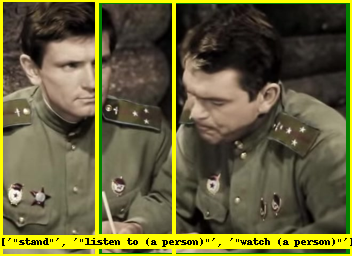

0
image id:  om_83F5VwTQ_1205
image id:  om_83F5VwTQ_1553
image id:  Lg1jOu8cUBM_1412


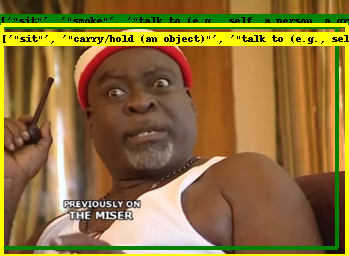

1
image id:  om_83F5VwTQ_1685
image id:  xeGWXqSvC-8_0912


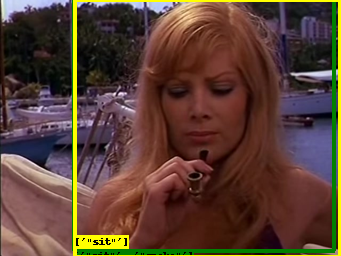

2
image id:  yn9WN9lsHRE_1208
image id:  xeGWXqSvC-8_0941


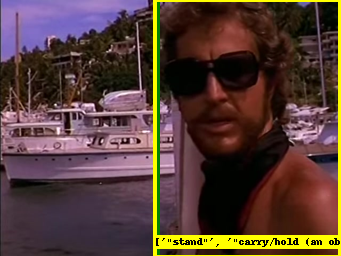

3
image id:  IzvOYVMltkI_1473
image id:  jE0S8gYWftE_1209


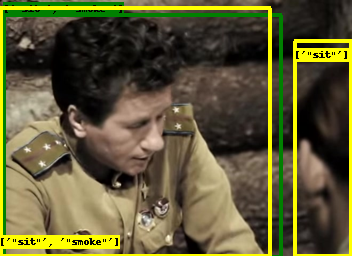

4
image id:  yn9WN9lsHRE_1161


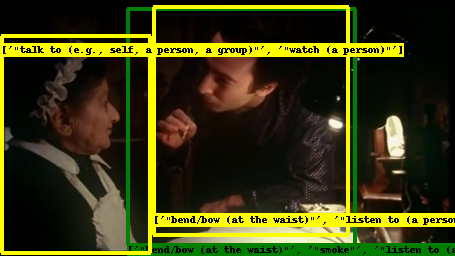

5
image id:  xeGWXqSvC-8_0906


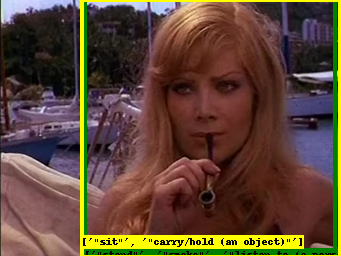

6
image id:  Z1YV6wB037M_1723
image id:  yn9WN9lsHRE_1163


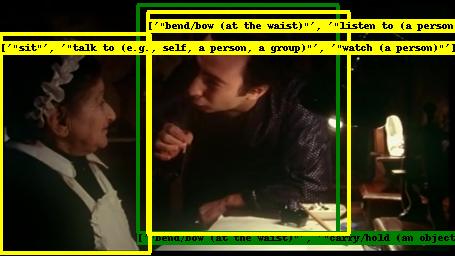

7
image id:  CMCPhm2L400_1349
image id:  IzvOYVMltkI_1449
image id:  XpGRS72ghag_1697


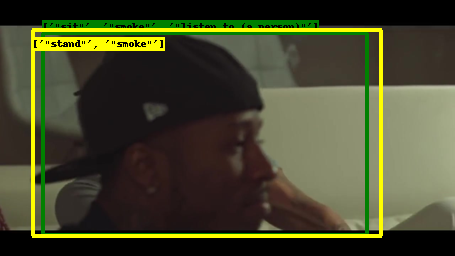

8
image id:  om_83F5VwTQ_1235
image id:  CMCPhm2L400_1318


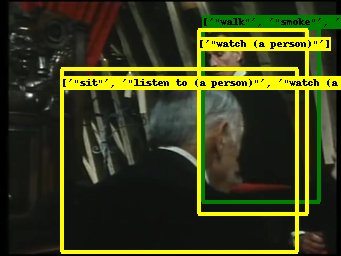

9
image id:  om_83F5VwTQ_1552
image id:  Gvp-cj3bmIY_1686
image id:  Gvp-cj3bmIY_1669


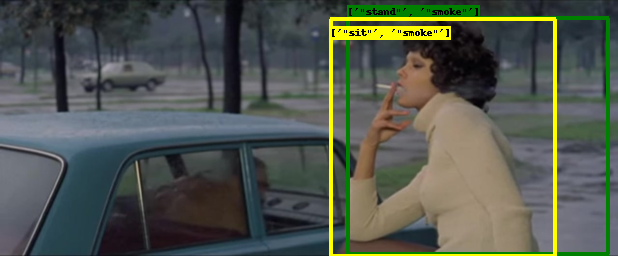

10
image id:  CZ2NP8UsPuE_1396


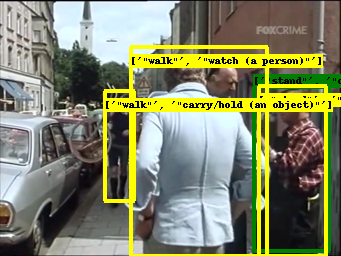

11
image id:  XpGRS72ghag_1696
image id:  XpGRS72ghag_0943
image id:  qx2vAO5ofmo_1137
image id:  Lg1jOu8cUBM_1320


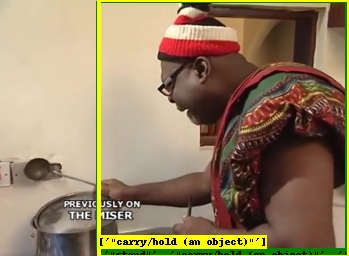

12
image id:  XpGRS72ghag_1762
image id:  Lg1jOu8cUBM_0905


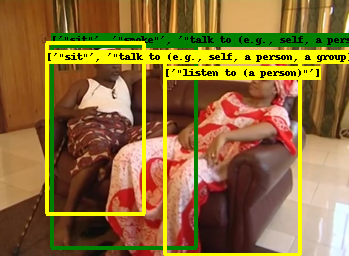

13
image id:  qx2vAO5ofmo_1199
image id:  om_83F5VwTQ_1610
image id:  CMCPhm2L400_1295


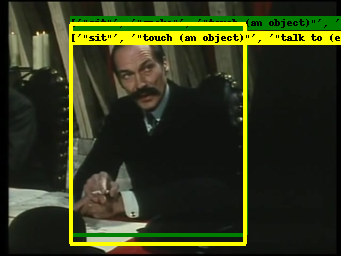

14
image id:  SCh-ZImnyyk_1765
image id:  CZ2NP8UsPuE_1561
image id:  Gvp-cj3bmIY_1675


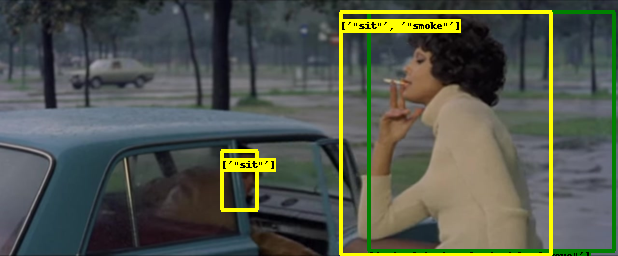

15
image id:  Gvp-cj3bmIY_1283
image id:  Lg1jOu8cUBM_1041
image id:  om_83F5VwTQ_1663
image id:  CMCPhm2L400_1298


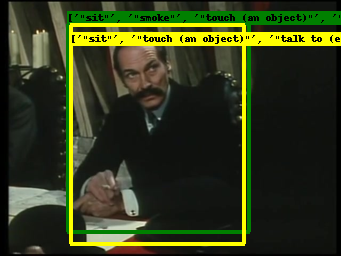

16


In [3]:
# from IPython.display import Image
import PIL
import os
# import sys
# module_path = "./visualization_utils.py"
# sys.path.append(module_path)
import visualization_utils_custom as vis_utils

number = 0
for image in list(anno_dict.keys())[2000:5000]:
    vid = image[:11]
    img_path = os.path.join(images_path, vid, vid+"_"+str(int(image[12:])*30-27000).zfill(6)+".jpg")
    img = PIL.Image.open(img_path)
    w, h = img.size
    if w >= h:
        nh = 256
        nw = 256 * w / h
    else:
        nw = 256
        nh = 256 * h / w
    
    img = img.resize((int(nw), int(nh)))

    try:
        num_gt_instances = len(anno_dict[image]["obj"])
        for i, (obj, coord) in enumerate(zip(anno_dict[image]["obj"], anno_dict[image]["coord"])):
            cat = str(obj)
            if ('smoke' in cat): #or ('crouch' in cat) or ('grab (a person)' in cat) or ('smoke' in cat):
                xmin, ymin, xmax, ymax = coord[0], coord[1], coord[2], coord[3]
                vis_utils.draw_bounding_box_on_image(
                    img, ymin, xmin, ymax, xmax,
                    color = 'Green',
                    display_str_list=[cat],
                    use_normalized_coordinates=False
                )
                print_pred = True
                print("image id: ", image)
            else:
                print_pred = False
        if print_pred:
            for j, (obj, coord) in enumerate(zip(pred_dict[image]["obj"], pred_dict[image]["coord"])):
                cat = str(obj)
                xmin, ymin, xmax, ymax = coord[0], coord[1], coord[2], coord[3]
                vis_utils.draw_bounding_box_on_image(
                    img, ymin, xmin, ymax, xmax,
                    color = 'Yellow',
                    display_str_list=[cat],
                    use_normalized_coordinates=False,
                    margin2=20
                )
            display(img)
            print(number)
        # print("number of GT instances: ", num_gt_instances)
        # print("number of predictions: ", num_predicted_instances)
            number += 1
        del img
    except:
        print("excluded key frame encountered, skip to the next frame")
        # user_input = str(input())
        # if user_input == "q": break
        # else: pass